In [1]:
# D&D chromosomes (from Munroes What if)
import random

def ddstat(): # strict ;)
    return random.randint(1,6) + random.randint(1,6) + random.randint(1,6)

def createcset(l):
    res = []
    for i in range(l-1):
        if random.random() > 0.8:
            res.append(-random.uniform(0.5, 2.5)) # multiplier
        else:
            res.append(ddstat())
    res.append(random.choice([-1, 1]))
    return res

def combine(cset0, cset1):
    if len(cset0) != len(cset1):
        return -1
    res = []
    for ic in range(len(cset0)-1):
        if cset0[ic] < 0: # multipliers are negative
            if cset1[ic] < 0:
                res.append(1)
            else:
                res.append(-cset0[ic] * cset1[ic])
        else:
            if cset1[ic] < 0:
                res.append(-cset0[ic] * cset1[ic])
            else:
                res.append(max(cset0[ic], cset1[ic]))
    if cset0[len(cset0)-1] < 0:
        if cset1[len(cset1)-1] < 0:
            res.append(-1) # female
        else:
            if random.random() > 0.5:
                res.append(1)
            else:
                res.append(-1)
    else:
        if cset1[len(cset1)-1] < 0:
            if random.random() > 0.5:
                res.append(1)
            else:
                res.append(-1)
        else:
            res.append(1) # male
    return res

if __name__=="__main__":
    print(combine([15, -2, -1, 12, -0.5, 14, -1], [5, 12, 14, -1.5, 14, 15, -1]))
    print(ddstat())
    print(createcset(7))
    print(combine(createcset(7), createcset(7)))

[15, 24, 14, 18.0, 7.0, 15, -1]
15
[12, -1.718981296582562, -1.2261028092508948, 10, 15, 10, 1]
[9.787629852120443, 12, 18, 10, 9.816271019156728, 10.497957486659898, 1]


In [1]:
# data model and other stuff from Fluent Python
import collections

Card = collections.namedtuple('Card', ['rank', 'suit']) # a named tuple!!!

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]
        
    def __len__(selt):
        return len(self-_cards)
    
    def __getitem__(self, position):
        return self._cards[position]
    
if __name__=="__main__":
    beer_card = Card('7', 'diamonds')
    print(beer_card)
    
    # list comprehensions
    symbols = '$%&/()'
    codes = [ord(symbol) for symbol in symbols]
    print(codes)
    
    # cartesian product
    colors = ['bl', 'wt']
    sizes = ['S', 'M', 'L']
    tshrts = [(color, size) for color in colors for size in sizes]
    print(tshrts)
    
    # generator expressions
    tsym = tuple(ord(symbol) for symbol in symbols)
    print(tsym)
    
    # tuples as records
    tids = [('US', '123456'), ('ES', '33454'), ('AT', '343443')]
    for passprt in sorted(tids):
        print('%s/%s' % passprt) # % formatting understands tuples
        
    # tuple unpacking
    thisctry, thisno = tids[0] # simple unpack
    print(thisctry, ' : ', thisno)
    t = (20, 8)
    print(divmod(*t)) # unpack with prefix
    a0, b0, *rest0, c0 = range(6) # use * to grab the rest (works at  any position)
    print(a0, b0, rest0, c0)
    metros = [('Tokyo', 36.9, (35.7, 139.7)), ('Sao Paulo', 19.6, (-23.5, -46.6))]
    for name, pop, (lat, long) in metros: # nested unpacking
        print(name, pop, long)

Card(rank='7', suit='diamonds')
[36, 37, 38, 47, 40, 41]
[('bl', 'S'), ('bl', 'M'), ('bl', 'L'), ('wt', 'S'), ('wt', 'M'), ('wt', 'L')]
(36, 37, 38, 47, 40, 41)
AT/343443
ES/33454
US/123456
US  :  123456
(2, 4)
0 1 [2, 3, 4] 5
Tokyo 36.9 139.7
Sao Paulo 19.6 -46.6


In [19]:
# more fluent python
import bisect
import sys

ROW_FMT = '{0:2d} @ {1:2d}   {2}{0:<2d}'

def demo(bisect_fn,haystack, needles):
    for needle in reversed(needles):
        pos = bisect_fn(haystack, needle)
        offset = pos * '  |'
        print(ROW_FMT.format(needle, pos, offset))

if __name__=="__main__":
    # slicing
    lst = [10, 20, 30, 40, 50, 60]
    print(lst[:3], lst[3:])
    lst[2::2] = [11, 22]
    print(lst)
    
    # augmented assignments
    lst += [70, 80]
    print(lst) # http://pythontutor.com
    
    # list sort vs. sorted
    fruits = ['apple', 'grape', 'raspberry', 'banana']
    print(id(fruits))
    fruits.sort # list sorted in place
    print(id(fruits), id(sorted(fruits))) # sorted creates a new list
    print(sorted(fruits)) # alphabetic
    print(sorted(fruits, key=len)) # by length
    
    # ordered sequences
    haystack = [1, 5, 4, 6, 12, 9, 14, 23, 25, 21, 29, 30]
    haystack.sort # must be sorted
    needles = [0, 1, 2, 3, 4, 11, 12, 29, 31]
    if sys.argv[-1] == 'left':
        bisect_fn = bisect.bisect_left
    else:
        bisect_fn = bisect.bisect
    print('DEMO:', bisect_fn.__name__) # print header
    print('haystack ->', ' '.join('%2d' % n for n in haystack))
    demo(bisect_fn, haystack, needles)

[10, 20, 30] [40, 50, 60]
[10, 20, 11, 40, 22, 60]
[10, 20, 11, 40, 22, 60, 70, 80]
1592658870472
1592658870472 1592658374472
['apple', 'banana', 'grape', 'raspberry']
['apple', 'grape', 'banana', 'raspberry']
DEMO: bisect
haystack ->  1  5  4  6 12  9 14 23 25 21 29 30
31 @ 12     |  |  |  |  |  |  |  |  |  |  |  |31
29 @ 11     |  |  |  |  |  |  |  |  |  |  |29
12 @  6     |  |  |  |  |  |12
11 @  6     |  |  |  |  |  |11
 4 @  1     |4 
 3 @  1     |3 
 2 @  1     |2 
 1 @  1     |1 
 0 @  0   0 


In [43]:
# tests activation functions
import numpy as np
import math

def relu(x, deriv=False):
    if deriv:
        return np.where(x < 0, 0, 1)
    return np.maximum(x, 0)

def softsign(x, deriv=False):
    if deriv:
        return np.true_divide(1, (1 + np.abs(x)) ** 2)
    return np.true_divide(x, 1 + np.abs(x))

if __name__=="__main__":
    x = np.random.randn(10, 1)
    #print(x, relu(x, True))
    print(x, softsign(x, True))

[[ 0.9544804 ]
 [ 0.11253967]
 [ 1.14443966]
 [-0.20255262]
 [ 0.69290701]
 [ 1.19982504]
 [-1.21081163]
 [ 0.73050698]
 [ 0.60329234]
 [-0.36076279]] [[0.26178054]
 [0.80792116]
 [0.21745647]
 [0.69149942]
 [0.34892637]
 [0.20664444]
 [0.20459571]
 [0.33392835]
 [0.38902236]
 [0.54005147]]


In [36]:
# tests deep fwd improvements
import numpy as np
import math

def relu(x, deriv=False):
    if deriv:
        return np.where(x < 0, 0, 1)
    return np.maximum(x, 0)

def softsign(x, deriv=False):
    if deriv:
        return np.true_divide(1, (1 + np.abs(x)) ** 2)
    return np.true_divide(x, 1 + np.abs(x))

# N is batch size; D_in is input dimension
# H is hidden dimension; D_out is output dimension
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
#w1 = np.random.randn(D_in, H)
#w2 = np.random.randn(H, D_out)
norminlim = math.sqrt(6. / (H + D_out)) # normalized initialization
w1 = np.random.uniform(-norminlim, norminlim, (D_in, H))
norminlim = math.sqrt(6. / D_out)
w2 = np.random.uniform(-norminlim, norminlim, (H, D_out))

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = np.dot(x, w1)
    #h_relu = np.maximum(h, 0)
    #h_relu = relu(h, False)
    h_relu = softsign(h, False)
    y_pred = np.dot(h_relu, w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 20 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = np.dot(h_relu.T, grad_y_pred) # dw2 = 2 (.) ReLu(h)
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = 2 (.) w2 ReLu'(h) x
    #grad_h = grad_h_relu.copy()
    #grad_h[h < 0] = 0 # ReLU'
    #grad_h = relu(grad_h_relu, True)
    grad_h = softsign(grad_h_relu, True)
    grad_w1 = np.dot(x.T, grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 6703.39511853615
20 6657.77114483068
40 6612.531225422927
60 6567.671222933659
80 6523.1916753198875
100 6479.09351362395
120 6435.370682741803
140 6392.016424056443
160 6349.024873238328
180 6306.393816127387
200 6264.121348798606
220 6222.20410032021
240 6180.643435274946
260 6139.441644811926
280 6098.593493813756
300 6058.09305418431
320 6017.934806332851
340 5978.11425465659
360 5938.626435750068
380 5899.466625103421
400 5860.627784700734
420 5822.103010665834
440 5783.889707937733
460 5745.988380422246
480 5708.4008708488


theta_best:  [[4.04963669]
 [2.88709671]]
prediction w best:  [[4.04963669]
 [9.82383011]]
Theta0:          4.050,
Theta1:          2.887
Final cost/MSE:  3096691.099
pred with estd. theta:  [4.04963669 9.82383011]


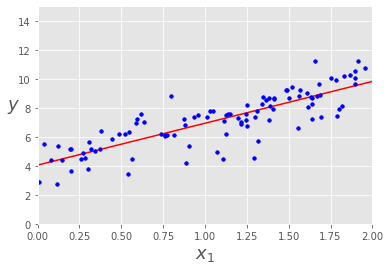

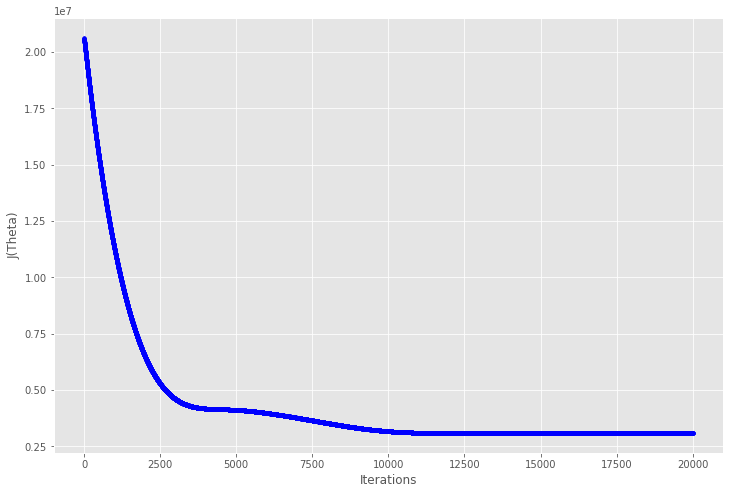

In [89]:
# grad descent test https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
import numpy as np
import matplotlib.pyplot as plt

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta) # y=b+mx -> h(theta) = theta0 + theta1 * x
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y))) # 
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

def adam(X, y, theta, learning_rate=0.01, iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
  
    alpha = 0.001 # Stepsize
    beta1 = 0.9 # exponential decay rates for the moment estimates
    beta2 = 0.999 
    epsilon = 10e-8 # overflow protection
    mt = np.zeros((iterations, 2)) # initialize 1st moment vector
    vt = np.zeros((iterations, 2)) # initialize 2nd moment vector
    #t = 0 # initialize timestep
    #while thetat not converged:
    for it in range(iterations):
        #t = t + 1
        
        prediction = np.dot(X, theta).reshape(m,1)
        #theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        gt = (1/m) * np.dot(X.T, prediction - y) # dJ/dthetaj=1/m(hi-yi)dhi/dthetaj, dhi/dthetaj=Xij
        #gt = gradient(ft(theta)) # Get gradients w.r.t. stochastic objective at timestep t
        if it > 0:
            mt[it] = beta1 * mt[it-1] + (1 - beta1) * gt.T # Update biased first moment estimate
            vt[it] = beta2 * vt[it-1] + (1 - beta2) * gt.T * gt.T
        # Update biased second raw moment estimate
        mvt = mt[it] / (1 - beta1 ** it + epsilon)
        # Compute bias-corrected first moment estimate
        vvt = vt[it] / (1 - beta2 ** it + epsilon)
        # Compute bias-corrected second raw moment estimate
        theta = theta.T - alpha * mvt / (np.sqrt(vvt) + epsilon) # Update parameters
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta, X, y)
        
    return theta, cost_history, theta_history

plt.style.use(['ggplot'])

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('theta_best: ', theta_best)

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
print('prediction w best: ', y_predict)

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

lr =0.01
n_iter = 20000

theta = np.random.randn(2)

X_b = np.c_[np.ones((len(X),1)), X] # c_ translates slice objects to concatenation along the second axis
#theta, cost_history, theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
theta, cost_history, theta_history = adam(X_b, y, theta, lr, n_iter)

#print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0])) # for all others
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0],theta[1])) # for ADAM
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

print('pred with estd. theta: ', X_new_b.dot(theta))

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')